In [54]:
from os import listdir
from matplotlib import image
import random
import numpy as np
import quantecon as qe
import networkx as nx
import pandas as pd
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

In [55]:
np.random.RandomState(10)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('mirflickr/' + filename)
	loaded_images.append(img_data)

In [58]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
   

In [59]:
RED = 0
GREEN = 1
BLUE = 2

In [60]:
#2.a Matematuchne ochikuvannya and Dispersia 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tMatematuchne ochikuvannya - {0:.2f},\tDispersia - {1:.2f}"\
.format(M_blue, D_blue))

Red:	Matematuchne ochikuvannya - 111.64,	Dispersia - 6093.09
Green:	Matematuchne ochikuvannya - 104.39,	Dispersia - 5679.97
Blue:	Matematuchne ochikuvannya - 96.86,	Dispersia - 5956.68


In [61]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans

In [62]:
#2.d Asymmetry and Ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsymmetry - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asymmetry - 0.191,	Ekscess - -1.185
Green:	Asymmetry - 0.325,	Ekscess - -1.046
Blue:	Asymmetry - 0.468,	Ekscess - -0.974


In [63]:
#3.Vectors of image parameters
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1

Vector_A:
[[ 1.11642302e+02  6.09309220e+03  1.91194498e-01 -1.18464012e+00]
 [ 1.04394189e+02  5.67997497e+03  3.25404594e-01 -1.04558026e+00]
 [ 9.68571567e+01  5.95667510e+03  4.67731486e-01 -9.73816321e-01]]


In [70]:
#4.Building Gaussian models

#a Matematuchne ochikuvannya
P_x1 = np.random.normal(M_red, D_red, 1)
print("Matematuchne ochikuvannya + colors:\n" + str(P_x1))

#b Matematuchne ochikuvannya and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("\nMatematuchne ochikuvannya + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Matematuchneematuchne ochikuvannya, dispersion and asymetry
print("\nMatematuchne ochikuvannya + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Matematuchne ochikuvannya, dispersion, asymetry and ekscess
print("\nMatematuchne ochikuvannya + dispersion + asymetry + ekscess + colors:\n" + str(P_x2[:4, :4]))

Matematuchne ochikuvannya + colors:
[-3042.86656881]

Matematuchne ochikuvannya + dispersion + colors:
[[6093.87767475 5163.28566796]
 [5163.28566796 5680.65744684]]

Matematuchne ochikuvannya + dispersion + asymetry + colors:
[[6093.87767475 5163.28566796 4479.23489655]
 [5163.28566796 5680.65744684 5228.08068188]
 [4479.23489655 5228.08068188 5957.4288361 ]]

Matematuchne ochikuvannya + dispersion + asymetry + ekscess + colors:
[[6093.87767475 5163.28566796 4479.23489655]
 [5163.28566796 5680.65744684 5228.08068188]
 [4479.23489655 5228.08068188 5957.4288361 ]]


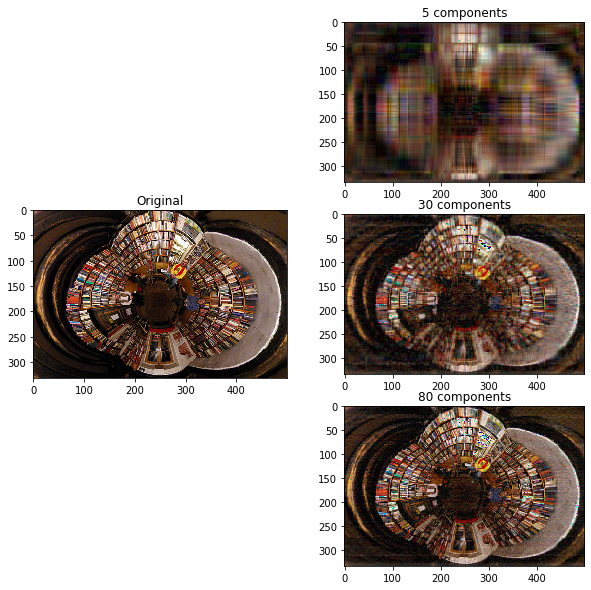

In [65]:
#5.a.PCA

test_img = loaded_images[0]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[0])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

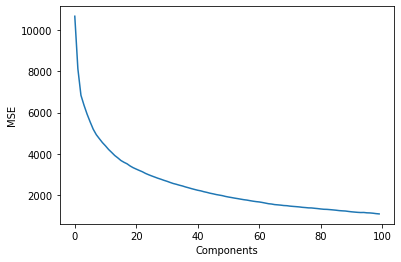

In [66]:
# b. MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [67]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.2786239  0.14728543 0.08869378 ... 0.         0.         0.00035836]
 [0.25832829 0.20109025 0.12447002 ... 0.         0.         0.        ]
 [0.2067913  0.16711179 0.16711179 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.06224066 0.07053942 0.14522822]
 [0.         0.         0.00369004 ... 0.0701107  0.07749077 0.16236162]
 [0.00107066 0.         0.         ... 0.04496788 0.03961456 0.16167024]]

Red matrix 2nd order:
 [[1.62969834e-01 1.05280904e-01 7.77546074e-02 ... 9.40151851e-05
  8.92275466e-05 4.65744768e-04]
 [1.81942955e-01 1.22285615e-01 9.20710595e-02 ... 3.92554466e-05
  3.69350070e-05 2.32724654e-04]
 [1.75373726e-01 1.21261966e-01 9.69048532e-02 ... 3.52558158e-05
  3.94791583e-05 1.95744569e-04]
 ...
 [1.54675700e-03 5.69855567e-04 5.99569295e-04 ... 2.53242761e-02
  2.67992293e-02 8.35893799e-02]
 [2.09882126e-03 1.12151086e-03 1.36917096e-03 ... 2.69234004e-02
  2.90955367e-02 9.23941929e-02]
 [1.896842

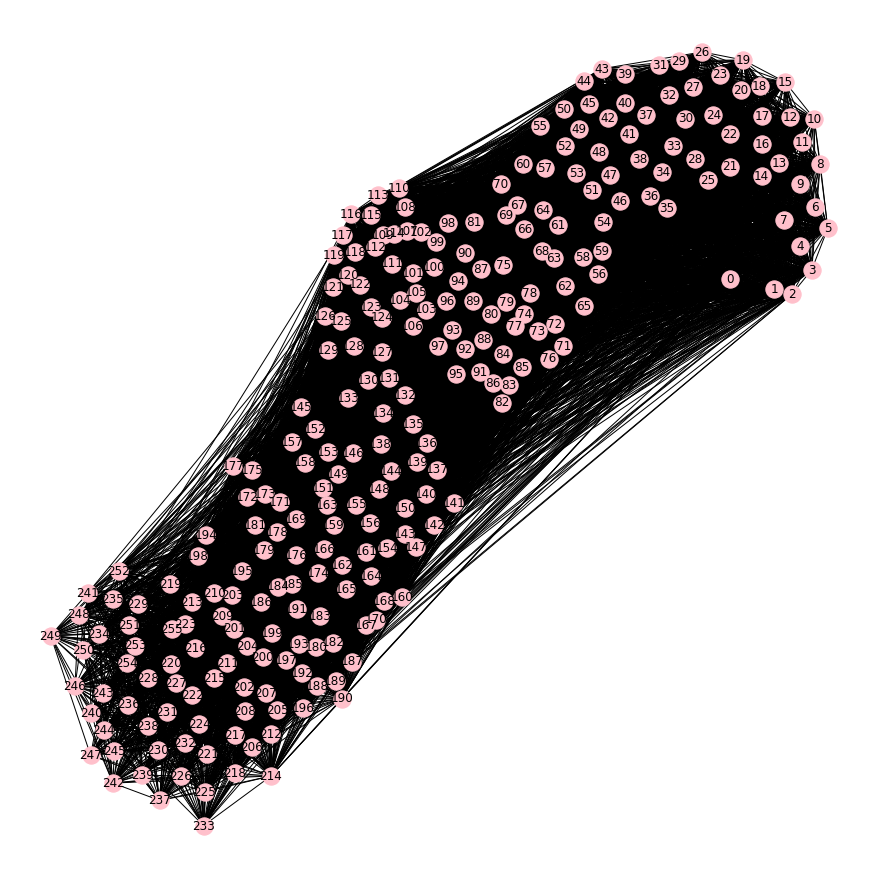

In [68]:
#Graph

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='pink', font_color='black')
plt.show()

In [69]:
test = pd.DataFrame(markov_matrix)
test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.245608,0.153776,0.113385,0.061764,0.048542,0.033146,0.021554,0.017932,0.015034,0.013041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.224613,0.192338,0.145106,0.084230,0.063238,0.039885,0.025977,0.021254,0.016793,0.013907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.173094,0.164685,0.159467,0.116266,0.069585,0.051609,0.034213,0.023195,0.016816,0.014497,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.136410,0.114872,0.127863,0.123419,0.092308,0.070085,0.047521,0.034530,0.027009,0.020171,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.105421,0.086729,0.093084,0.122617,0.100187,0.077383,0.067664,0.052710,0.029907,0.028411,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009091,0.009091,0.009091,0.027273,0.045455,0.027273,0.054545,0.054545,0.136364
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008403,0.000000,0.016807,0.000000,0.050420,0.050420,0.067227,0.067227,0.050420,0.210084
253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015385,0.015385,0.023077,0.007692,0.015385,0.053846,0.038462,0.061538,0.107692,0.138462
254,0.006849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013699,0.020548,0.041096,0.054795,0.075342,0.061644,0.075342,0.123288


In [71]:
def regularity_check(matrix):
    counter = 0
    for a in range(1,6):
        matrix = np.linalg.matrix_power(matrix,a)

        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j] < 0:
                    counter += 1 
        print('iteration: ' , a, 'negative elements: ' ,counter)
        
regularity_check(markov_matrix)
print('Для 5-ти ітерації, виконується умова регулярності. \nМодель регулярна ')

P = markov_matrix
mc = qe.MarkovChain(P, [str(i) for i in range(0,256)])
print('\nМодель незворотня -  ', mc.is_irreducible)
print("\nКількість рекурентних станів " ,np.shape(mc.recurrent_classes)[1])
if np.shape(mc.recurrent_classes_indices)[1] == 256:
    print('Всі стани рекурентні, модель рекурентна. ')
else :
    print('Модель не рекурентна' )

iteration:  1 negative elements:  0
iteration:  2 negative elements:  0
iteration:  3 negative elements:  0
iteration:  4 negative elements:  0
iteration:  5 negative elements:  0
Для 5-ти ітерації, виконується умова регулярності. 
Модель регулярна 

Модель незворотня -   True

Кількість рекурентних станів  256
Всі стани рекурентні, модель рекурентна. 
